# Random Forest Ensemble model

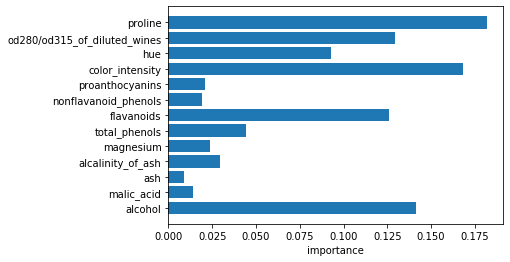

In [1]:

from sklearn.ensemble import RandomForestClassifier # model
from sklearn.datasets import load_wine # dataset
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# 1. dataset load
wine = load_wine()
wine.feature_names
wine.target_names

X = wine.data
y = wine.target

X.shape # (178,13)


# 2. RF model
rf = RandomForestClassifier()
'''
n_estimators : integer, optional (default=100) : 트리 수
criterion : string, optional (default="gini") or "entropy" : 중요변수 선정
max_depth : integer or None, optional (default=None) : 트리깊이
min_samples_split : int, float, optional (default=2) : 노드 분할 최소 샘플 수
min_samples_leaf : int, float, optional (default=1) : 단노드 분할 최소 샘플 수
max_features : int, float, string or None, optional (default="auto") : 최대 x변수 사용수
n_jobs : int or None, optional (default=None) : CPU 수
random_state : int, RandomState instance or None, optional (default=None) : 시드 값 지정
'''

rf

import numpy as np

idx = np.random.choice(a=X.shape[0], size=int(X.shape[0]*0.7), replace=False)

X_train = X[idx]
y_train = y[idx]

model = rf.fit(X_train,y_train)

idx_test = [i for i in range(len(X)) if not i in idx]
len(idx_test) # 54

x_test = X[idx_test]
y_test = y[idx_test]

x_test.shape # (54,13)

y_pred = model.predict(x_test)
y_true = y_test

con_mat = confusion_matrix(y_true,y_pred)
acc = accuracy_score(y_true,y_pred)
report = classification_report(y_true,y_pred)

con_mat
acc # 0.9814814814814815
report

# 중요변수
model.feature_importances_
len(model.feature_importances_) # 13

# 중요변수 시각화
import matplotlib.pyplot as plt

x_size = X.shape[1]
plt.barh(range(x_size), model.feature_importances_) # (y,x)
plt.yticks(range(x_size), wine.feature_names)
plt.xlabel('importance')
plt.show()
